In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import xarray as xr

import regionmask

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.feature as cfeat
from mpl_toolkits.axes_grid1 import make_axes_locatable
import feather, h5py, sys, pickle
from shapely.geometry import Point, Polygon

import netCDF4
import geopandas

np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

# Import data and process

In [2]:
gen = feather.read_dataframe(f'../optimization_model/outputs/gen_normal.feather')
carac = pd.read_csv(f'../optimization_model/good_model_inputs/inputs_gen_normal.csv')
carac.loc[carac['FuelType'] == 'Pumps', 'FuelType'] = 'Hydro' #change pumps to hydro label
# Clean columns name
carac = carac.drop('Unnamed: 0', axis=1)

# Merge
df_normal = pd.concat((carac,gen), axis=1)
df_normal['2016_365_23'] = df_normal['2016_365_22'].copy()

col_list = list(gen.columns)
col_list.append('2016_365_23')
df_normal['total_gen'] = df_normal[col_list].sum(axis=1)


In [3]:
gen = feather.read_dataframe(f'../optimization_model/outputs/gen_no-nuclear.feather')
carac = pd.read_csv(f'../optimization_model/good_model_inputs/inputs_gen_no-nuclear_all-generators_20k-new_name.csv')
carac.loc[carac['FuelType'] == 'Pumps', 'FuelType'] = 'Hydro' #change pumps to hydro label
# Clean columns name
carac = carac.drop('Unnamed: 0', axis=1)

# Merge
df_nonuc = pd.concat((carac,gen), axis=1)
df_nonuc['2016_365_23'] = df_nonuc['2016_365_22'].copy()

col_list = list(gen.columns)
col_list.append('2016_365_23')
df_nonuc['total_gen'] = df_nonuc[col_list].sum(axis=1)


/home/emfreese/anaconda3/envs/grid_mod/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
gen = feather.read_dataframe(f'../optimization_model/outputs/gen_no-nuclear_no-coal.feather')
carac = pd.read_csv(f'../optimization_model/good_model_inputs/inputs_gen_no-nuclear_no_coal.csv')
carac.loc[carac['FuelType'] == 'Pumps', 'FuelType'] = 'Hydro' #change pumps to hydro label
# Clean columns name
carac = carac.drop('Unnamed: 0', axis=1)

# Merge
df_nocoal = pd.concat((carac,gen), axis=1)
df_nocoal['2016_365_23'] = df_nocoal['2016_365_22'].copy()

col_list = list(gen.columns)
col_list.append('2016_365_23')
df_nocoal['total_gen'] = df_nocoal[col_list].sum(axis=1)


# Plot

## Difference

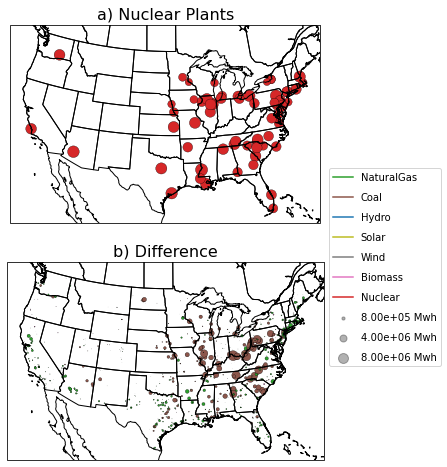

In [5]:
fig = plt.figure(figsize=[16,8])
mod_factor = 80000


###### Nuclear Plot ######

plants = ['Nuclear'] 

fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
color_dict = {'NaturalGas':'C2', 'Biomass':'C6', 'Coal':'C5', 
              'Hydro':'C0', 'LF Gas':'C4', 'Non-Fossil':'C9',
               'Nuclear':'C3', 'Oil':'C10', 
              'Pet. Coke':'C15', 'Solar':'C8', 
              'Wind':'C7', 'MSW':'C11', 
              'Fwaste':'C12', 'Waste Coal':'C13', 'Geothermal':'C14'}
color_list = [color_dict[fuel] for fuel in fuel_type]

###### Create axes ######
ax=fig.add_subplot(2,1,1, projection=ccrs.LambertConformal())
ax.coastlines()
ax.add_feature(cfeat.STATES)
ax.set_title('a) Nuclear Plants', fontsize = 16)

###### plot #######
#create lat and lon 
lat_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LAT']
lon_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LON']
#color based on the fuel type
fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
#size based on generation
size=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor
#PCM parameters and plot for observations
PCM_o=ax.scatter(lon_o, lat_o, c=color_list, s = size, transform=ccrs.PlateCarree(),linewidth=.3, marker = 'o', edgecolor = 'k', 
                  alpha = 1.)
###### increase plot size ######
plants = ['NaturalGas'] 

fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
color_dict = {'NaturalGas':'C2', 'Biomass':'C6', 'Coal':'C5', 
              'Hydro':'C0', 'LF Gas':'C4', 'Non-Fossil':'C9',
               'Nuclear':'C3', 'Oil':'C10', 
              'Pet. Coke':'C15', 'Solar':'C8', 
              'Wind':'C7', 'MSW':'C11', 
              'Fwaste':'C12', 'Waste Coal':'C13', 'Geothermal':'C14'}
color_list = [color_dict[fuel] for fuel in fuel_type]
###### plot #######
#create lat and lon 
lat_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LAT']
lon_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LON']
#color based on the fuel type
fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
#size based on generation
size=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor
#PCM parameters and plot for observations
PCM_o=ax.scatter(lon_o, lat_o, c=color_list, s = size, transform=ccrs.PlateCarree(),linewidth=.3, marker = 'o', edgecolor = 'k', 
                  alpha = 0)

###### Difference Plot ######
plants = ['NaturalGas','Coal', 'Hydro','Solar','Wind', 'Biomass', 'Nuclear'] 

fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
color_dict = {'NaturalGas':'C2', 'Biomass':'C6', 'Coal':'C5', 
              'Hydro':'C0', 'LF Gas':'C4', 'Non-Fossil':'C9',
               'Nuclear':'C3', 'Oil':'C10', 
              'Pet. Coke':'C15', 'Solar':'C8', 
              'Wind':'C7', 'MSW':'C11', 
              'Fwaste':'C12', 'Waste Coal':'C13', 'Geothermal':'C14'}
color_list = [color_dict[fuel] for fuel in fuel_type]


###### Create axes ######
ax=fig.add_subplot(2,1,2, projection=ccrs.LambertConformal())
ax.coastlines()
ax.add_feature(cfeat.STATES)
ax.set_title('b) Difference', fontsize = 16)

###### plot #######
#create lat and lon for observations
lat_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LAT']
lon_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LON']
#color based on the fuel type
fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
#size based on generation
size=df_nonuc.loc[(df_nonuc['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor- df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor
#PCM parameters and plot for observations
PCM_o=ax.scatter(lon_o, lat_o, c=color_list, s = size, transform=ccrs.PlateCarree(),linewidth=.3, marker = 'o', edgecolor = 'k', 
                  alpha = 1.)
for key in plants:
    plt.plot([],[],label=key, color=color_dict[key])
plt.legend();

for size in [10, 50, 100]:
    plt.scatter([], [], c='k', alpha=0.3, s=size,
                label="{:.2e}".format(size*mod_factor) + ' Mwh')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, bbox_to_anchor = (1.0,1.5));

plt.savefig('./Figures/plants_difference.png', bbox_inches = 'tight', dpi = 150)

In [11]:
#confirm no coal in the no coal scenario
df_nocoal.loc[(df_nocoal['FuelType'].isin(plants))]['FuelType'].unique()

array(['NaturalGas', 'Biomass', 'Hydro', 'Solar', 'Wind'], dtype=object)

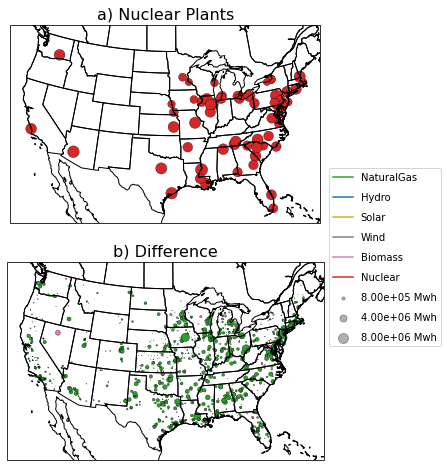

In [13]:
fig = plt.figure(figsize=[16,8])
mod_factor = 80000


###### Nuclear Plot ######

plants = ['Nuclear'] 

fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
color_dict = {'NaturalGas':'C2', 'Biomass':'C6', 'Coal':'C5', 
              'Hydro':'C0', 'LF Gas':'C4', 'Non-Fossil':'C9',
               'Nuclear':'C3', 'Oil':'C10', 
              'Pet. Coke':'C15', 'Solar':'C8', 
              'Wind':'C7', 'MSW':'C11', 
              'Fwaste':'C12', 'Waste Coal':'C13', 'Geothermal':'C14'}
color_list = [color_dict[fuel] for fuel in fuel_type]

###### Create axes ######
ax=fig.add_subplot(2,1,1, projection=ccrs.LambertConformal())
ax.coastlines()
ax.add_feature(cfeat.STATES)
ax.set_title('a) Nuclear Plants', fontsize = 16)

###### plot #######
#create lat and lon 
lat_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LAT']
lon_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LON']
#color based on the fuel type
fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
#size based on generation
size=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor
#PCM parameters and plot for observations
PCM_o=ax.scatter(lon_o, lat_o, c=color_list, s = size, transform=ccrs.PlateCarree(),linewidth=.3, marker = 'o', edgecolor = 'k', 
                  alpha = 1.)
###### increase plot size ######
plants = ['NaturalGas'] 

fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
color_dict = {'NaturalGas':'C2', 'Biomass':'C6', 'Coal':'C5', 
              'Hydro':'C0', 'LF Gas':'C4', 'Non-Fossil':'C9',
               'Nuclear':'C3', 'Oil':'C10', 
              'Pet. Coke':'C15', 'Solar':'C8', 
              'Wind':'C7', 'MSW':'C11', 
              'Fwaste':'C12', 'Waste Coal':'C13', 'Geothermal':'C14'}
color_list = [color_dict[fuel] for fuel in fuel_type]
###### plot #######
#create lat and lon 
lat_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LAT']
lon_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LON']
#color based on the fuel type
fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
#size based on generation
size=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor
#PCM parameters and plot for observations
PCM_o=ax.scatter(lon_o, lat_o, c=color_list, s = size, transform=ccrs.PlateCarree(),linewidth=.3, marker = 'o', edgecolor = 'k', 
                  alpha = 0)

###### Difference Plot ######
plants = ['NaturalGas', 'Hydro','Solar','Wind', 'Biomass', 'Nuclear'] 

fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
color_dict = {'NaturalGas':'C2', 'Biomass':'C6',
              'Hydro':'C0', 'LF Gas':'C4', 'Non-Fossil':'C9',
               'Nuclear':'C3', 'Oil':'C10', 
              'Pet. Coke':'C15', 'Solar':'C8', 
              'Wind':'C7', 'MSW':'C11', 
              'Fwaste':'C12', 'Waste Coal':'C13', 'Geothermal':'C14'}
color_list = [color_dict[fuel] for fuel in fuel_type]


###### Create axes ######
ax=fig.add_subplot(2,1,2, projection=ccrs.LambertConformal())
ax.coastlines()
ax.add_feature(cfeat.STATES)
ax.set_title('b) Difference', fontsize = 16)

###### observations #######
#create lat and lon for observations
lat_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LAT']
lon_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LON']
#color based on the fuel type
fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
#size based on generation
size=df_nocoal.loc[(df_nocoal['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor- df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor
#PCM parameters and plot for observations
PCM_o=ax.scatter(lon_o, lat_o, c=color_list, s = size, transform=ccrs.PlateCarree(),linewidth=.3, marker = 'o', edgecolor = 'k', 
                  alpha = 1.)
for key in plants:
    plt.plot([],[],label=key, color=color_dict[key])
plt.legend();

for size in [10, 50, 100]:
    plt.scatter([], [], c='k', alpha=0.3, s=size,
                label="{:.2e}".format(size*mod_factor) + ' Mwh')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, bbox_to_anchor = (1.0,1.5));

#plt.savefig('./Figures/plants_difference.png', bbox_inches = 'tight', dpi = 150)

In [30]:
#print the %change
for plant in ['NaturalGas','Coal', 'Hydro','Solar','Wind', 'Biomass']:
    print(plant, 100*(df_nonuc.loc[(df_nonuc['FuelType'] == (plant))].groupby(['ORISCode']).mean()['total_gen']- 
 df_normal.loc[(df_normal['FuelType'] == (plant))].groupby(['ORISCode']).mean()['total_gen']).sum()/(df_normal.loc[(df_normal['FuelType'] == (plant))].groupby(['ORISCode']).mean()['total_gen']).sum())

NaturalGas 22.709769083271755
Coal 42.45292609120524
Hydro 0.0
Solar 0.0
Wind 0.0
Biomass 36.47183751642895


In [15]:
#print the %change
for plant in ['NaturalGas', 'Hydro','Solar','Wind', 'Biomass']:
    print(plant, 100*(df_nocoal.loc[(df_nonuc['FuelType'] == (plant))].groupby(['ORISCode']).mean()['total_gen']- 
 df_normal.loc[(df_normal['FuelType'] == (plant))].groupby(['ORISCode']).mean()['total_gen']).sum()/(df_normal.loc[(df_normal['FuelType'] == (plant))].groupby(['ORISCode']).mean()['total_gen']).sum())

NaturalGas 53.91268831230212
Hydro 0.5208816130705364
Solar 0.07955254536599161
Wind 0.02738734225281015
Biomass 14.274069771774478


## No Nuclear and Normal

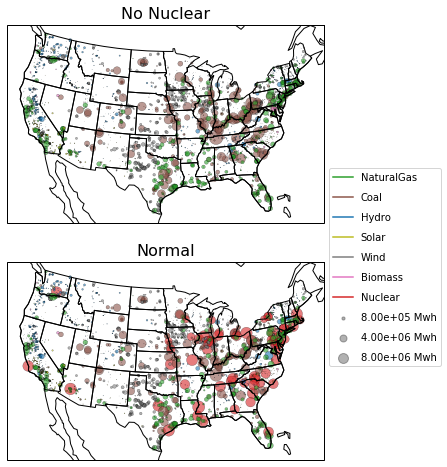

In [6]:
fig = plt.figure(figsize=[16,8])
mod_factor = 80000

###### Create axes ######
ax=fig.add_subplot(2,1,1, projection=ccrs.LambertConformal())
ax.coastlines()
ax.add_feature(cfeat.STATES)
ax.set_title('No Nuclear', fontsize = 16)

##### Choose plants for no nuclear #####
plants = ['NaturalGas','Coal', 'Hydro','Solar','Wind', 'Biomass']

fuel_type=df_nonuc.loc[(df_nonuc['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
color_dict = {'NaturalGas':'C2', 'Biomass':'C6', 'Coal':'C5', 
              'Hydro':'C0', 'LF Gas':'C4', 'Non-Fossil':'C9',
               'Nuclear':'C3', 'Oil':'C10', 
              'Pet. Coke':'C15', 'Solar':'C8', 
              'Wind':'C7', 'MSW':'C11', 
              'Fwaste':'C12', 'Waste Coal':'C13', 'Geothermal':'C14'}
color_list = [color_dict[fuel] for fuel in fuel_type]

###### observations #######
#create lat and lon for observations
lat_o = df_nonuc.loc[(df_nonuc['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LAT']
lon_o = df_nonuc.loc[(df_nonuc['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LON']
#color based on the fuel type
fuel_type=df_nonuc.loc[(df_nonuc['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
#size based on generation
size=df_nonuc.loc[(df_nonuc['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor
#PCM parameters and plot for observations
PCM_o=ax.scatter(lon_o, lat_o, c=color_list, s = size, transform=ccrs.PlateCarree(),linewidth=.3, marker = 'o', edgecolor = 'k', 
                  alpha = 0.6)
############################ Normal ######################################

###### Create axes ######
ax=fig.add_subplot(2,1,2, projection=ccrs.LambertConformal())
ax.coastlines()
ax.add_feature(cfeat.STATES)
ax.set_title('Normal', fontsize = 16)
##### Choose plants for normal #####
plants = ['NaturalGas','Coal', 'Hydro','Solar','Wind', 'Biomass', 'Nuclear'] 

fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
color_dict = {'NaturalGas':'C2', 'Biomass':'C6', 'Coal':'C5', 
              'Hydro':'C0', 'LF Gas':'C4', 'Non-Fossil':'C9',
               'Nuclear':'C3', 'Oil':'C10', 
              'Pet. Coke':'C15', 'Solar':'C8', 
              'Wind':'C7', 'MSW':'C11', 
              'Fwaste':'C12', 'Waste Coal':'C13', 'Geothermal':'C14'}
color_list = [color_dict[fuel] for fuel in fuel_type]

###### observations #######
#create lat and lon for observations
lat_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LAT']
lon_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LON']
#color based on the fuel type
fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
#size based on generation
size=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor
#PCM parameters and plot for observations

PCM_o=ax.scatter(lon_o, lat_o, c=color_list, s = size, transform=ccrs.PlateCarree(),linewidth=.3, marker = 'o', edgecolor = 'k', 
                  alpha = 0.6)
for key in plants:
    plt.plot([],[],label=key, color=color_dict[key])
plt.legend();

for size in [10, 50, 100]:
    plt.scatter([], [], c='k', alpha=0.3, s=size,
                label="{:.2e}".format(size*mod_factor) + ' Mwh')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, bbox_to_anchor = (1.0,1.5))


plt.savefig('./Figures/plants_map.png', bbox_inches = 'tight', dpi = 150)

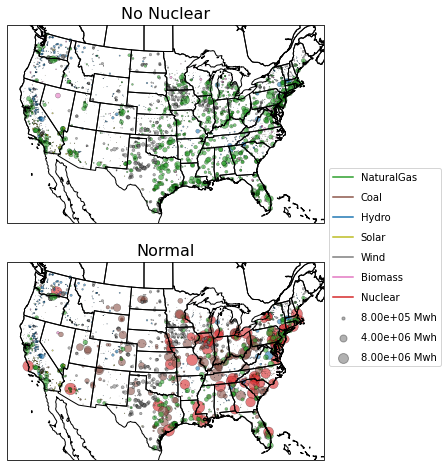

In [10]:
fig = plt.figure(figsize=[16,8])
mod_factor = 80000

###### Create axes ######
ax=fig.add_subplot(2,1,1, projection=ccrs.LambertConformal())
ax.coastlines()
ax.add_feature(cfeat.STATES)
ax.set_title('No Nuclear', fontsize = 16)

##### Choose plants for no nuclear #####
plants = ['NaturalGas','Coal', 'Hydro','Solar','Wind', 'Biomass']

fuel_type=df_nocoal.loc[(df_nocoal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
color_dict = {'NaturalGas':'C2', 'Biomass':'C6', 'Coal':'C5', 
              'Hydro':'C0', 'LF Gas':'C4', 'Non-Fossil':'C9',
               'Nuclear':'C3', 'Oil':'C10', 
              'Pet. Coke':'C15', 'Solar':'C8', 
              'Wind':'C7', 'MSW':'C11', 
              'Fwaste':'C12', 'Waste Coal':'C13', 'Geothermal':'C14'}
color_list = [color_dict[fuel] for fuel in fuel_type]

###### observations #######
#create lat and lon for observations
lat_o = df_nocoal.loc[(df_nocoal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LAT']
lon_o = df_nocoal.loc[(df_nocoal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LON']
#color based on the fuel type
fuel_type=df_nocoal.loc[(df_nocoal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
#size based on generation
size=df_nocoal.loc[(df_nocoal['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor
#PCM parameters and plot for observations
PCM_o=ax.scatter(lon_o, lat_o, c=color_list, s = size, transform=ccrs.PlateCarree(),linewidth=.3, marker = 'o', edgecolor = 'k', 
                  alpha = 0.6)
############################ Normal ######################################

###### Create axes ######
ax=fig.add_subplot(2,1,2, projection=ccrs.LambertConformal())
ax.coastlines()
ax.add_feature(cfeat.STATES)
ax.set_title('Normal', fontsize = 16)
##### Choose plants for normal #####
plants = ['NaturalGas','Coal', 'Hydro','Solar','Wind', 'Biomass', 'Nuclear'] 

fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
color_dict = {'NaturalGas':'C2', 'Biomass':'C6', 'Coal':'C5', 
              'Hydro':'C0', 'LF Gas':'C4', 'Non-Fossil':'C9',
               'Nuclear':'C3', 'Oil':'C10', 
              'Pet. Coke':'C15', 'Solar':'C8', 
              'Wind':'C7', 'MSW':'C11', 
              'Fwaste':'C12', 'Waste Coal':'C13', 'Geothermal':'C14'}
color_list = [color_dict[fuel] for fuel in fuel_type]

###### observations #######
#create lat and lon for observations
lat_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LAT']
lon_o = df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['LON']
#color based on the fuel type
fuel_type=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).first()['FuelType']
#size based on generation
size=df_normal.loc[(df_normal['FuelType'].isin(plants))].groupby(['ORISCode']).mean()['total_gen']/mod_factor
#PCM parameters and plot for observations

PCM_o=ax.scatter(lon_o, lat_o, c=color_list, s = size, transform=ccrs.PlateCarree(),linewidth=.3, marker = 'o', edgecolor = 'k', 
                  alpha = 0.6)
for key in plants:
    plt.plot([],[],label=key, color=color_dict[key])
plt.legend();

for size in [10, 50, 100]:
    plt.scatter([], [], c='k', alpha=0.3, s=size,
                label="{:.2e}".format(size*mod_factor) + ' Mwh')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, bbox_to_anchor = (1.0,1.5))


#plt.savefig('./Figures/plants_map.png', bbox_inches = 'tight', dpi = 150)